In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# accessing the csv file
df = pd.read_csv("E:\ML Projects\Taxifare\TaxiFare.csv")

In [3]:
df.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


# Data processing,refining,visualization

In [6]:
# converting date_time_of_pickup data type "Object" to "datetime" data type 

df["date_time_of_pickup"] = pd.to_datetime(df["date_time_of_pickup"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   unique_id             50000 non-null  object             
 1   amount                50000 non-null  float64            
 2   date_time_of_pickup   50000 non-null  datetime64[ns, UTC]
 3   longitude_of_pickup   50000 non-null  float64            
 4   latitude_of_pickup    50000 non-null  float64            
 5   longitude_of_dropoff  50000 non-null  float64            
 6   latitude_of_dropoff   50000 non-null  float64            
 7   no_of_passenger       50000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 3.1+ MB


In [8]:
# seperating time and data 
df["date"]  = df["date_time_of_pickup"].dt.day
df["month"] = df["date_time_of_pickup"].dt.month
df["year"] = df["date_time_of_pickup"].dt.year 
df["day_of_week"] = df["date_time_of_pickup"].dt.day_name()
df["weekend"] = np.where(df["day_of_week"].isin(["Saturday","Sunday"]),1,0)
df["Hr"] = df["date_time_of_pickup"].dt.hour
df["Min"] = df["date_time_of_pickup"].dt.minute 
df["Sec"]  = df["date_time_of_pickup"].dt.second

In [9]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,month,year,day_of_week,weekend,Hr,Min,Sec
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,Monday,0,17,26,21
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,Tuesday,0,16,52,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,Thursday,0,0,35,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,Saturday,1,4,30,42
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,Tuesday,0,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,Wednesday,0,23,25,15
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,Monday,0,17,19,18
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,Sunday,1,4,53,0
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,Tuesday,0,7,9,0


In [10]:
#  min value of amount 
df["amount"].min()

-5.0

In [11]:
# As we can see there are negative values of amount, so i will be removing the data in the amount which has value <= 0 
df = df[df["amount"]> 0] 


In [12]:
df

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,month,year,day_of_week,weekend,Hr,Min,Sec
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,Monday,0,17,26,21
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,Tuesday,0,16,52,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,Thursday,0,0,35,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,Saturday,1,4,30,42
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,Tuesday,0,7,51,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,25:15.0,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,Wednesday,0,23,25,15
49996,19:18.0,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,Monday,0,17,19,18
49997,53:00.0,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,Sunday,1,4,53,0
49998,09:00.0,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,Tuesday,0,7,9,0


In [13]:
# minimum value passenger count 
df["no_of_passenger"].min()

0

In [14]:
# minimum passengers should be greater than zero so
df = df[df["no_of_passenger"]>0]


In [15]:
# checking null values
df.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
date                    0
month                   0
year                    0
day_of_week             0
weekend                 0
Hr                      0
Min                     0
Sec                     0
dtype: int64

Text(0.5, 1.0, 'Distribution of amount')

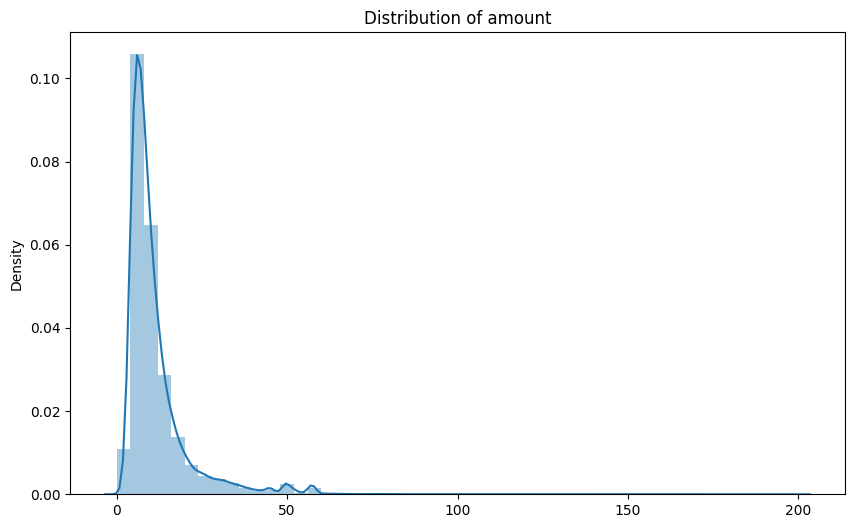

In [23]:
plt.figure(figsize=(10,6))
sns.distplot(x=df["amount"])
plt.title("Distribution of amount")

<Axes: xlabel='day_of_week', ylabel='no_of_passenger'>

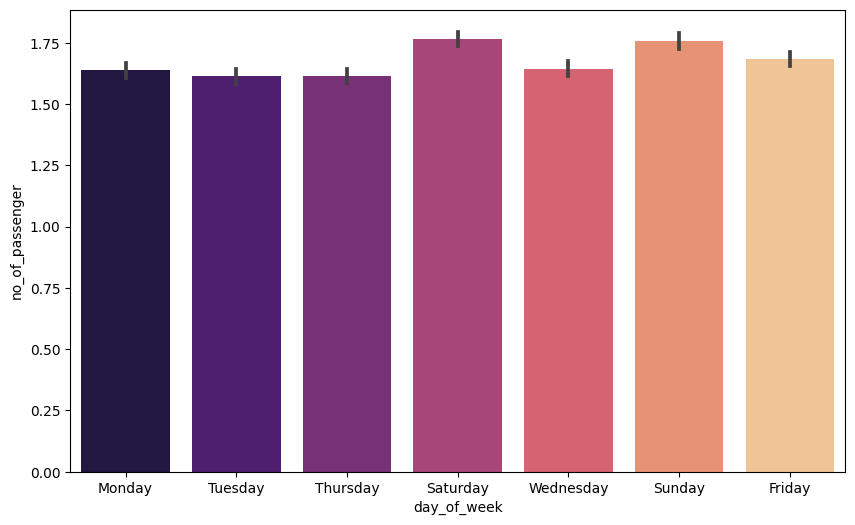

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["day_of_week"],y=df["no_of_passenger"],palette="magma")


<Axes: xlabel='weekend', ylabel='count'>

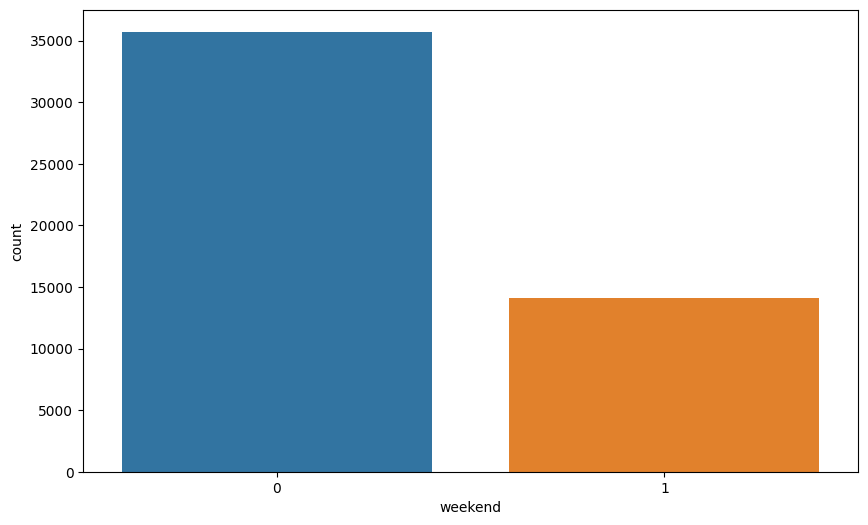

In [25]:
# visualization of Weekend days 
plt.figure(figsize=(10,6))
sns.countplot(x=df["weekend"])


In [26]:
df1=df.copy()

In [27]:
df =df.drop(columns = "unique_id",axis =1)

In [31]:
# checking the max and min values of latitude and longitude
print(df["latitude_of_dropoff"].min(),df["latitude_of_dropoff"].max(),df["longitude_of_dropoff"].min(),df["longitude_of_dropoff"].max(),sep="\n")
print("\n")
print(df["latitude_of_pickup"].min(),df["latitude_of_pickup"].max(),df["longitude_of_pickup"].min(),df["longitude_of_pickup"].max(),sep="\n")

-74.006377
43.41519
-84.654241
40.851027


-74.006893
401.083332
-75.42384832
40.783472


In [32]:
# dropping the value 401.083332
df = df[df["latitude_of_pickup"] != 401.083332 ]

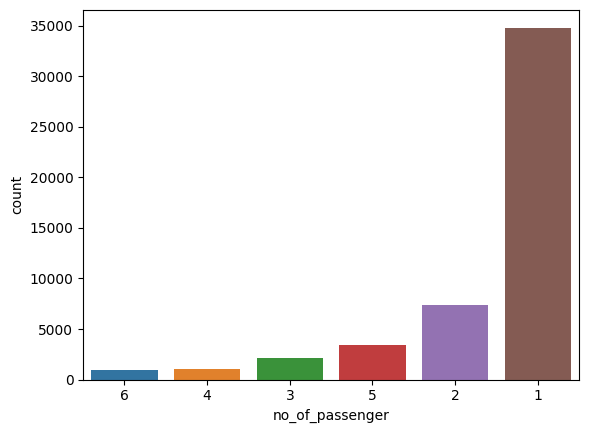

In [34]:
# visualization of passenger count
data_count = df["no_of_passenger"].value_counts().reset_index()
data_count.columns = ["no_of_passenger","count"]
data_count = data_count.sort_values("count",ascending=True)
sns.barplot(data=data_count,y="count",x="no_of_passenger",order=data_count["no_of_passenger"])
plt.show()

# USING HAVERSINE TO GET THE DISTANCE

In [36]:
# Using Haversine Library to Calulate Distance in KMs 
from haversine import haversine
def dist(lat1,lon1,lat2,lon2):
    x= (lat1,lon1)
    y= (lat2,lon2)
    return haversine(x,y)

df["distance"] = df.apply(lambda row: dist(row["latitude_of_pickup"], row["longitude_of_pickup"], row["latitude_of_dropoff"], row["longitude_of_dropoff"]), axis=1)


In [39]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,month,year,day_of_week,weekend,Hr,Min,Sec,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,Monday,0,17,26,21,1.030765
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,Tuesday,0,16,52,16,8.450145
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,Thursday,0,0,35,0,1.389527
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,Saturday,1,4,30,42,2.799274
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,Tuesday,0,7,51,0,1.999160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,Wednesday,0,23,25,15,4.940381
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,Monday,0,17,19,18,0.874707
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,Sunday,1,4,53,0,2.263289
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,Tuesday,0,7,9,0,0.665246


In [44]:
# converting the "day_of_week" data type "object" to "int"
df["day_of_week"].replace(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],[1,2,3,4,5,6,7],inplace=True)

In [45]:
df["day_of_week"].value_counts()

day_of_week
5    7636
6    7606
4    7380
3    7185
2    6901
1    6620
7    6497
Name: count, dtype: int64

In [46]:
df

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,month,year,day_of_week,weekend,Hr,Min,Sec,distance
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,1,0,17,26,21,1.030765
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,2,0,16,52,16,8.450145
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,4,0,0,35,0,1.389527
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,6,1,4,30,42,2.799274
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,2,0,7,51,0,1.999160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,2013-06-12 23:25:15+00:00,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,3,0,23,25,15,4.940381
49996,7.5,2015-06-22 17:19:18+00:00,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,1,0,17,19,18,0.874707
49997,6.9,2011-01-30 04:53:00+00:00,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,7,1,4,53,0,2.263289
49998,4.5,2012-11-06 07:09:00+00:00,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,2,0,7,9,0,0.665246


In [47]:
df.drop(columns={"date_time_of_pickup","Min","Sec"},inplace=True)

In [48]:
df


,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,date,month,year,day_of_week,weekend,Hr,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,15,6,2009,1,0,17,1.030765
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,5,1,2010,2,0,16,8.450145
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,18,8,2011,4,0,0,1.389527
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,21,4,2012,6,1,4,2.799274
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,9,3,2010,2,0,7,1.999160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,15.0,-73.999973,40.748531,-74.016899,40.705993,1,12,6,2013,3,0,23,4.940381
49996,7.5,-73.984756,40.768211,-73.987366,40.760597,1,22,6,2015,1,0,17,0.874707
49997,6.9,-74.002698,40.739428,-73.998108,40.759483,1,30,1,2011,7,1,4,2.263289
49998,4.5,-73.946062,40.777567,-73.953450,40.779687,2,6,11,2012,2,0,7,0.665246


Text(0.5, 1.0, 'Heat Map')

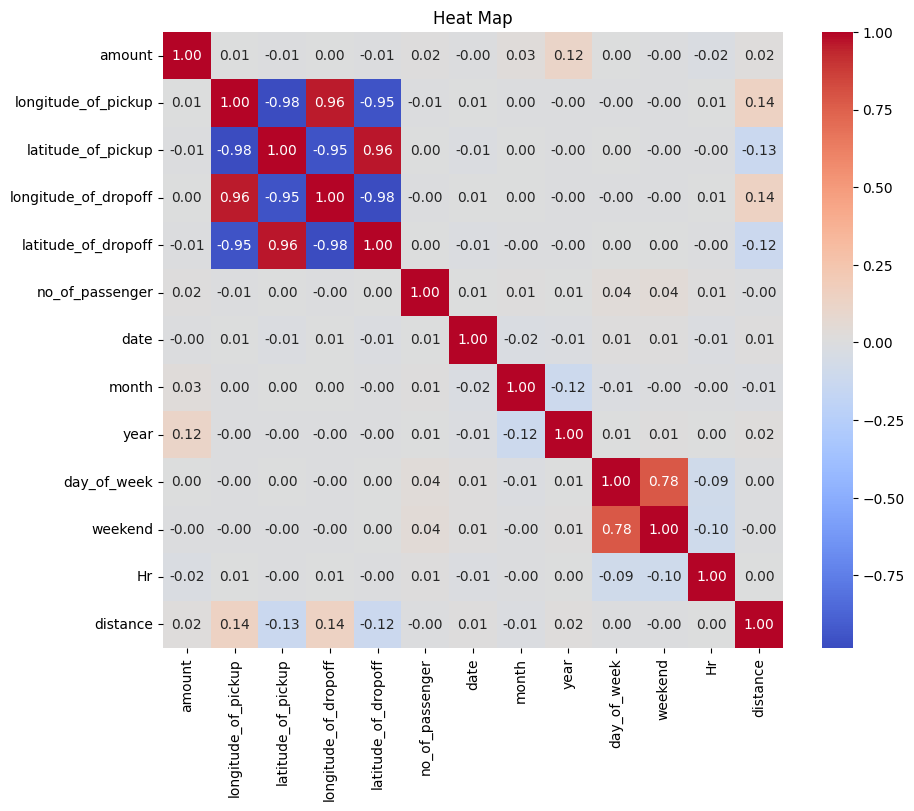

In [49]:
corr_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heat Map")

# Model Development

In [83]:
from sklearn.model_selection import train_test_split
x = df.drop(columns="amount",axis=1)
y = df["amount"]
print(x.shape,y.shape)

(49825, 12) (49825,)


# Standardizing the data

In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [84]:
x = scaler.fit_transform(x)
x.shape

(49825, 12)

In [92]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import r2_score, mean_squared_error

# Linear regression is not good as there is no any correlation between features

In [94]:
model_lr= LinearRegression()
model_lr.fit(x_train,y_train)

LinearRegression()

In [95]:
x_test_pred = model_lr.predict(x_test)
mse_lr = mean_squared_error(x_test_pred,y_test)
mse_lr

90.11748925691252

# Decision Tree Regressor

In [96]:
model_dt = DecisionTreeRegressor(max_depth=5)
model_dt.fit(x_train,y_train)
x_test_pred_dt = model_dt.predict(x_test)
r2_dt = r2_score(x_test_pred_dt,y_test)
r2_dt 

0.6951760076734197

# Bagging Regressor

In [97]:
model_bg = BaggingRegressor(n_estimators=100)
model_bg.fit(x_train,y_train)
x_test_pred_bg= model_bg.predict(x_test)
r2_bg = r2_score(x_test_pred_bg,y_test)
r2_bg


0.7589786926946925

# Random Forest Regressor

In [98]:
model_rf = RandomForestRegressor(n_estimators=100,max_depth=5)
model_rf.fit(x_train,y_train)
x_test_pred_fr = model_rf.predict(x_test)
r2_rf = r2_score(x_test_pred_fr,y_test)
r2_rf
rsme = mean_squared_error(x_test_pred_fr,y_test)
print(rsme,r2_rf)

20.893843491887417 0.6964498659808596


# Ada Boost Regressor

In [99]:
model_ada = AdaBoostRegressor(n_estimators=200,learning_rate=0.0001)
model_ada.fit(x_train,y_train)
x_test_pred_ada =model_ada.predict(x_test)
r2_ada = r2_score(x_test_pred_ada,y_test)
r2_ada



0.6089155960580707

# The Best Model would be bagging regressor model as it has good r2 score than the other models developed  